In [378]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import load_breast_cancer

In [361]:
class KernelSVM:
    def __init__(self, C, degree, gamma, kernel):
        self.C = C
        self.gamma = gamma
        self.kernel = kernel
        self.degree = degree
    
    def rbf(self, X1, X2):
        return np.exp(-self.gamma * np.sum((X2 - X1[:,np.newaxis])**2, axis = -1))
    
    def poly(self, X1, X2, k=0.5):
        # TODO: Need to add a constant term as well...
        return (np.matmul(X1, np.transpose(X2))+k)**self.degree
    
    # TODO: trying something different to see if that works...
    def poly2(self, X1, k=10):
        X = X1.copy()
        # Finding the Square of X1, X2
        X[:,0] = X1[:,0] ** 2
        X[:,1] = X1[:,1] ** 2
        # Finding the product of X1 and X2
        X_square = np.zeros((len(X1), 1))
        X_square[:,0] = 2 * X1[:,0] * X1[:,1]
        X = np.hstack((X, X_square))
        return X
    
    def linear(self, X):
        return X
    
    def loss(self, y, y_cap):
        hinge_loss_params = 1-y*y_cap
        hinge_loss = np.sum(np.where(hinge_loss_params<0, 0, hinge_loss_params)) / len(y)
        regularization_loss = sum(self.W**2)/2
        return self.C * hinge_loss + regularization_loss
    
    def compute_gradients(self, X, Y, Y_cap, n):
        # differentiation of [1/2 * W**2 + C * (1-y*(W*X+b))]
        
        dW = (-self.C * np.multiply(Y, X.T).T + self.W).T
        for i in range(self.W.shape[0]):
            dW[i] = np.where(1-Y_cap <= 0, self.W[i], dW[i])
        dW = np.sum(dW, axis=1)
        dW = dW/n
        
        db = -Y * self.b
        db = np.where(1-Y_cap <= 0, 0, db)
        db = sum(db)
        db = db / n
        
        return dW, db
    
    def train(self, X, Y, epochs, lr):
        
        self.x_start = X.copy()
        
        if self.kernel == "rbf":
            print(X.shape)
            X = self.rbf(X, X)
            print(X.shape)
        elif self.kernel == "poly":
            print(X.shape)
            X = self.poly(X, X)
            print(X.shape)
        elif self.kernel == "poly2":
            X = self.poly2(X)
        elif self.kernel == "linear":
            X = self.linear(X)
        else:
            print("Unexpected kernel type...")
        
        n_instances = X.shape[0]
        n_features = X.shape[1]
        
        # TODO: Should maybe try random initialization and check performance...
        self.W = np.zeros(n_features)
        # TODO: Initializing this to random doesnt generate decision boundary for circles... Why?
        self.b = 0.0
        
        for epoch in range(epochs):
            y_cap = np.dot(X,self.W) + self.b
            loss = self.loss(Y, y_cap)
            print("Epoch No: " + str(epoch) + ", Loss: " + str(loss))
            dW, db = self.compute_gradients(X, Y, y_cap, n_instances)
            self.W -= lr * dW
            self.b -= lr * db
    
    def predict(self, X):
        if self.kernel == "rbf":
            X = self.rbf(X, self.x_start)
        elif self.kernel == "poly":
            X = self.poly(X, self.x_start)
        elif self.kernel == "linear":
            X = self.linear(X)
        elif self.kernel == "poly2":
            X = self.poly2(X)
        return np.where(np.dot(X, self.W) + self.b > 0, 1, -1)
    
    def evaluate(self, X, Y):
        y_cap = self.predict(X)
        acc = len(np.where(y_cap == Y)[0]) / len(Y)
        return acc

In [362]:
def decision_boundary(model, X, Y):
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.arange(X1_min, X1_max, 0.02), np.arange(X2_min, X2_max, 0.02))

    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.scatter(X[np.where(Y==-1)[0], 0], X[np.where(Y==-1)[0], 1], label='-1')
    plt.scatter(X[np.where(Y==1)[0], 0], X[np.where(Y==1)[0], 1], label='1')
    plt.contour(XX, YY, Z, cmap=plt.cm.Paired)
    plt.legend()
    plt.show()

In [363]:
# Q. 3.3

In [410]:
X, Y = make_circles(1500)
Y[np.where(Y==0)] = -1

In [411]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=250, random_state=1)

In [412]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=250, random_state=1)

In [357]:
# RBF kernel in SVM
# C=1, gamma = 100, epochs=1000, lr=0.001
svm = KernelSVM(C=1, degree=None, gamma=100, kernel="rbf")
svm.train(X_train, Y_train, epochs=1000, lr=0.001)

(1000, 2)
(1000, 1000)
Epoch No: 0, Loss: 1.0
Epoch No: 1, Loss: 0.9997397304756174
Epoch No: 2, Loss: 0.9994799812300141
Epoch No: 3, Loss: 0.9992207512231527
Epoch No: 4, Loss: 0.9989620394170751
Epoch No: 5, Loss: 0.9987038447758977
Epoch No: 6, Loss: 0.9984461662658081
Epoch No: 7, Loss: 0.9981890028550602
Epoch No: 8, Loss: 0.9979323535139702
Epoch No: 9, Loss: 0.9976762172149132
Epoch No: 10, Loss: 0.9974205929323181
Epoch No: 11, Loss: 0.9971654796426638
Epoch No: 12, Loss: 0.9969108763244755
Epoch No: 13, Loss: 0.9966567819583202
Epoch No: 14, Loss: 0.996403195526803
Epoch No: 15, Loss: 0.9961501160145624
Epoch No: 16, Loss: 0.9958975424082666
Epoch No: 17, Loss: 0.9956454736966098
Epoch No: 18, Loss: 0.9953939088703079
Epoch No: 19, Loss: 0.9951428469220936
Epoch No: 20, Loss: 0.9948922868467136
Epoch No: 21, Loss: 0.9946422276409245
Epoch No: 22, Loss: 0.9943926683034876
Epoch No: 23, Loss: 0.9941436078351664
Epoch No: 24, Loss: 0.9938950452387212
Epoch No: 25, Loss: 0.993646

Epoch No: 214, Loss: 0.9546477227714694
Epoch No: 215, Loss: 0.9544781124492666
Epoch No: 216, Loss: 0.9543088411780979
Epoch No: 217, Loss: 0.9541399082802005
Epoch No: 218, Loss: 0.9539713130791656
Epoch No: 219, Loss: 0.9538030548999378
Epoch No: 220, Loss: 0.9536351330688102
Epoch No: 221, Loss: 0.9534675469134231
Epoch No: 222, Loss: 0.9533002957627605
Epoch No: 223, Loss: 0.9531333789471482
Epoch No: 224, Loss: 0.9529667957982503
Epoch No: 225, Loss: 0.9528005456490669
Epoch No: 226, Loss: 0.9526346278339318
Epoch No: 227, Loss: 0.9524690416885093
Epoch No: 228, Loss: 0.9523037865497915
Epoch No: 229, Loss: 0.9521388617560959
Epoch No: 230, Loss: 0.9519742666470628
Epoch No: 231, Loss: 0.9518100005636528
Epoch No: 232, Loss: 0.9516460628481432
Epoch No: 233, Loss: 0.9514824528441274
Epoch No: 234, Loss: 0.9513191698965092
Epoch No: 235, Loss: 0.9511562133515036
Epoch No: 236, Loss: 0.9509935825566314
Epoch No: 237, Loss: 0.9508312768607181
Epoch No: 238, Loss: 0.950669295613891
E

Epoch No: 441, Loss: 0.9236731352820515
Epoch No: 442, Loss: 0.9235654431602399
Epoch No: 443, Loss: 0.9234579663149801
Epoch No: 444, Loss: 0.9233507043159339
Epoch No: 445, Loss: 0.9232436567336239
Epoch No: 446, Loss: 0.9231368231394306
Epoch No: 447, Loss: 0.9230302031055924
Epoch No: 448, Loss: 0.9229237962052016
Epoch No: 449, Loss: 0.9228176020122046
Epoch No: 450, Loss: 0.9227116201013998
Epoch No: 451, Loss: 0.9226058500484348
Epoch No: 452, Loss: 0.9225002914298052
Epoch No: 453, Loss: 0.9223949438228545
Epoch No: 454, Loss: 0.9222898068057699
Epoch No: 455, Loss: 0.9221848799575826
Epoch No: 456, Loss: 0.9220801628581649
Epoch No: 457, Loss: 0.9219756550882288
Epoch No: 458, Loss: 0.9218713562293248
Epoch No: 459, Loss: 0.9217672658638398
Epoch No: 460, Loss: 0.9216633835749954
Epoch No: 461, Loss: 0.9215597089468464
Epoch No: 462, Loss: 0.9214562415642791
Epoch No: 463, Loss: 0.9213529810130096
Epoch No: 464, Loss: 0.9212499268795817
Epoch No: 465, Loss: 0.921147078751367
E

Epoch No: 649, Loss: 0.9053316951128447
Epoch No: 650, Loss: 0.9052606675299315
Epoch No: 651, Loss: 0.9051897819311567
Epoch No: 652, Loss: 0.9051190380326937
Epoch No: 653, Loss: 0.9050484355512838
Epoch No: 654, Loss: 0.904977974204234
Epoch No: 655, Loss: 0.9049076537094172
Epoch No: 656, Loss: 0.9048374737852696
Epoch No: 657, Loss: 0.9047674341507903
Epoch No: 658, Loss: 0.9046975345255402
Epoch No: 659, Loss: 0.904627774629641
Epoch No: 660, Loss: 0.9045581541837737
Epoch No: 661, Loss: 0.9044886729091778
Epoch No: 662, Loss: 0.9044193305276498
Epoch No: 663, Loss: 0.9043501267615424
Epoch No: 664, Loss: 0.9042810613337634
Epoch No: 665, Loss: 0.9042121339677748
Epoch No: 666, Loss: 0.9041433443875905
Epoch No: 667, Loss: 0.9040746923177773
Epoch No: 668, Loss: 0.9040061774834514
Epoch No: 669, Loss: 0.9039377996102793
Epoch No: 670, Loss: 0.9038695584244758
Epoch No: 671, Loss: 0.9038014536528027
Epoch No: 672, Loss: 0.9037334850225682
Epoch No: 673, Loss: 0.9036656522616254
Ep

Epoch No: 877, Loss: 0.8923153930178718
Epoch No: 878, Loss: 0.8922703850228463
Epoch No: 879, Loss: 0.8922254669988031
Epoch No: 880, Loss: 0.8921806387658899
Epoch No: 881, Loss: 0.8921359001446143
Epoch No: 882, Loss: 0.8920912509558426
Epoch No: 883, Loss: 0.8920466910207993
Epoch No: 884, Loss: 0.8920022201610661
Epoch No: 885, Loss: 0.8919578381985817
Epoch No: 886, Loss: 0.8919135449556401
Epoch No: 887, Loss: 0.8918693402548912
Epoch No: 888, Loss: 0.8918252239193389
Epoch No: 889, Loss: 0.8917811957723416
Epoch No: 890, Loss: 0.8917372556376101
Epoch No: 891, Loss: 0.8916934033392079
Epoch No: 892, Loss: 0.8916496387015502
Epoch No: 893, Loss: 0.8916059615494032
Epoch No: 894, Loss: 0.8915623717078834
Epoch No: 895, Loss: 0.8915188690024567
Epoch No: 896, Loss: 0.8914754532589383
Epoch No: 897, Loss: 0.8914321243034911
Epoch No: 898, Loss: 0.8913888819626258
Epoch No: 899, Loss: 0.8913457260632
Epoch No: 900, Loss: 0.891302656432417
Epoch No: 901, Loss: 0.891259672897826
Epoch

In [358]:
# RBF kernel in SVM
# C=1, gamma = 100, epochs=1000, lr=0.001
# Accuracy = 100%
svm.evaluate(X_test, Y_test)

1.0

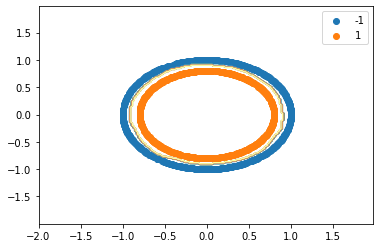

In [359]:
decision_boundary(svm, X_train, Y_train)

In [421]:
# Polynomial kernel in SVM
# C=1, degree = 2, epochs = 1000, lr = 0.01
# Accuracy = 
svm = KernelSVM(C=0.5, degree=3, gamma=None, kernel="poly")
svm.train(X_train, Y_train, epochs=1000, lr=0.01)

(1000, 2)
(1000, 1000)
Epoch No: 0, Loss: 0.5
Epoch No: 1, Loss: 0.4684624756025958
Epoch No: 2, Loss: 0.4375525479406999
Epoch No: 3, Loss: 0.47130152552324395
Epoch No: 4, Loss: 0.5440408821795394
Epoch No: 5, Loss: 0.6163467956057679
Epoch No: 6, Loss: 0.6882177506225338
Epoch No: 7, Loss: 0.759652363609508
Epoch No: 8, Loss: 0.8306493788733331
Epoch No: 9, Loss: 0.9012076650979471
Epoch No: 10, Loss: 0.9713262118755844
Epoch No: 11, Loss: 1.0410041263167513
Epoch No: 12, Loss: 1.1102406297374994
Epoch No: 13, Loss: 1.1790350544223656
Epoch No: 14, Loss: 1.2473868404613717
Epoch No: 15, Loss: 1.3152955326595164
Epoch No: 16, Loss: 1.3827607775172208
Epoch No: 17, Loss: 1.4497823202802156
Epoch No: 18, Loss: 1.5163600020574064
Epoch No: 19, Loss: 1.5824937570052584
Epoch No: 20, Loss: 1.6481836095772955
Epoch No: 21, Loss: 1.7134296718373203
Epoch No: 22, Loss: 1.778232140835
Epoch No: 23, Loss: 1.8425912960424882
Epoch No: 24, Loss: 1.9065074968507816
Epoch No: 25, Loss: 1.969981180

Epoch No: 237, Loss: 8.260754155422575
Epoch No: 238, Loss: 8.270236486793358
Epoch No: 239, Loss: 8.27962665891676
Epoch No: 240, Loss: 8.288925540370336
Epoch No: 241, Loss: 8.29813399210086
Epoch No: 242, Loss: 8.307252867479642
Epoch No: 243, Loss: 8.316283012357705
Epoch No: 244, Loss: 8.325225265120825
Epoch No: 245, Loss: 8.334080456744399
Epoch No: 246, Loss: 8.342849410848208
Epoch No: 247, Loss: 8.351532943750955
Epoch No: 248, Loss: 8.360131864524684
Epoch No: 249, Loss: 8.36864697504901
Epoch No: 250, Loss: 8.377079070065152
Epoch No: 251, Loss: 8.385428937229815
Epoch No: 252, Loss: 8.393697357168843
Epoch No: 253, Loss: 8.401885103530725
Epoch No: 254, Loss: 8.409992943039843
Epoch No: 255, Loss: 8.418021635549572
Epoch No: 256, Loss: 8.425971934095127
Epoch No: 257, Loss: 8.433844584946234
Epoch No: 258, Loss: 8.441640327659545
Epoch No: 259, Loss: 8.449359895130854
Epoch No: 260, Loss: 8.457004013647106
Epoch No: 261, Loss: 8.464573402938125
Epoch No: 262, Loss: 8.47206

Epoch No: 460, Loss: 9.118842268318378
Epoch No: 461, Loss: 9.119876077717953
Epoch No: 462, Loss: 9.120899579142618
Epoch No: 463, Loss: 9.121912875072754
Epoch No: 464, Loss: 9.122916066975867
Epoch No: 465, Loss: 9.123909255316475
Epoch No: 466, Loss: 9.124892539565908
Epoch No: 467, Loss: 9.125866018212003
Epoch No: 468, Loss: 9.126829788768744
Epoch No: 469, Loss: 9.127783947785751
Epoch No: 470, Loss: 9.128728590857717
Epoch No: 471, Loss: 9.129663812633762
Epoch No: 472, Loss: 9.130589706826655
Epoch No: 473, Loss: 9.131506366222002
Epoch No: 474, Loss: 9.132413882687304
Epoch No: 475, Loss: 9.13331234718095
Epoch No: 476, Loss: 9.134201849761116
Epoch No: 477, Loss: 9.135082479594587
Epoch No: 478, Loss: 9.135954324965464
Epoch No: 479, Loss: 9.136817473283854
Epoch No: 480, Loss: 9.137672011094384
Epoch No: 481, Loss: 9.138518024084735
Epoch No: 482, Loss: 9.139355597094
Epoch No: 483, Loss: 9.140184814121032
Epoch No: 484, Loss: 9.141005758332673
Epoch No: 485, Loss: 9.141818

Epoch No: 684, Loss: 9.211461844930296
Epoch No: 685, Loss: 9.211570955314901
Epoch No: 686, Loss: 9.211678974929399
Epoch No: 687, Loss: 9.211785914674856
Epoch No: 688, Loss: 9.21189178534344
Epoch No: 689, Loss: 9.211996597619553
Epoch No: 690, Loss: 9.21210036208086
Epoch No: 691, Loss: 9.212203089199384
Epoch No: 692, Loss: 9.21230478934255
Epoch No: 693, Loss: 9.212405472774215
Epoch No: 694, Loss: 9.212505149655726
Epoch No: 695, Loss: 9.21260383004694
Epoch No: 696, Loss: 9.212701523907212
Epoch No: 697, Loss: 9.212798241096412
Epoch No: 698, Loss: 9.212893991375934
Epoch No: 699, Loss: 9.212988784409657
Epoch No: 700, Loss: 9.213082629764923
Epoch No: 701, Loss: 9.213175536913502
Epoch No: 702, Loss: 9.213267515232552
Epoch No: 703, Loss: 9.213358574005552
Epoch No: 704, Loss: 9.21344872242324
Epoch No: 705, Loss: 9.213537969584555
Epoch No: 706, Loss: 9.213626324497515
Epoch No: 707, Loss: 9.213713796080166
Epoch No: 708, Loss: 9.213800393161454
Epoch No: 709, Loss: 9.2138861

Epoch No: 918, Loss: 9.221335527419749
Epoch No: 919, Loss: 9.221345917598349
Epoch No: 920, Loss: 9.221356203878184
Epoch No: 921, Loss: 9.221366387298188
Epoch No: 922, Loss: 9.221376468886898
Epoch No: 923, Loss: 9.221386449662566
Epoch No: 924, Loss: 9.221396330633269
Epoch No: 925, Loss: 9.221406112797004
Epoch No: 926, Loss: 9.221415797141775
Epoch No: 927, Loss: 9.221425384645734
Epoch No: 928, Loss: 9.221434876277224
Epoch No: 929, Loss: 9.221444272994924
Epoch No: 930, Loss: 9.221453575747924
Epoch No: 931, Loss: 9.221462785475813
Epoch No: 932, Loss: 9.221471903108807
Epoch No: 933, Loss: 9.221480929567795
Epoch No: 934, Loss: 9.221489865764475
Epoch No: 935, Loss: 9.22149871260143
Epoch No: 936, Loss: 9.221507470972204
Epoch No: 937, Loss: 9.221516141761422
Epoch No: 938, Loss: 9.221524725844851
Epoch No: 939, Loss: 9.221533224089516
Epoch No: 940, Loss: 9.221541637353754
Epoch No: 941, Loss: 9.221549966487334
Epoch No: 942, Loss: 9.221558212331521
Epoch No: 943, Loss: 9.221

In [422]:
svm.evaluate(X_test, Y_test)

0.476

/var/folders/v0/g401c4x979d___jdl5ddw2_r0000gn/T/ipykernel_97974/2569798981.py:12: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, Z, cmap=plt.cm.Paired)


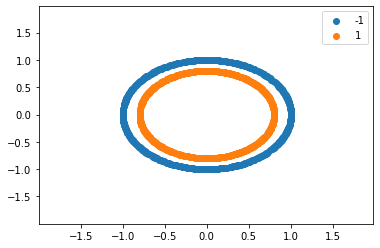

In [423]:
decision_boundary(svm, X_train, Y_train)

In [287]:
# Q. 3.4

In [424]:
X, Y = load_breast_cancer(return_X_y=True)
Y[np.where(Y==0)] = -1

In [425]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)

In [426]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=95, random_state=1)

In [397]:
svm = KernelSVM(C=1, degree=None, gamma=1, kernel="rbf")
svm.train(X_train, Y_train, epochs=1000, lr=0.001)

(379, 30)
(379, 379)
Epoch No: 0, Loss: 1.0
Epoch No: 1, Loss: 0.9999973627968205
Epoch No: 2, Loss: 0.9999947308654104
Epoch No: 3, Loss: 0.999992104195231
Epoch No: 4, Loss: 0.9999894827757653
Epoch No: 5, Loss: 0.9999868665965169
Epoch No: 6, Loss: 0.9999842556470114
Epoch No: 7, Loss: 0.9999816499167937
Epoch No: 8, Loss: 0.9999790493954303
Epoch No: 9, Loss: 0.9999764540725092
Epoch No: 10, Loss: 0.999973863937639
Epoch No: 11, Loss: 0.9999712789804484
Epoch No: 12, Loss: 0.9999686991905868
Epoch No: 13, Loss: 0.9999661245577254
Epoch No: 14, Loss: 0.9999635550715549
Epoch No: 15, Loss: 0.9999609907217879
Epoch No: 16, Loss: 0.9999584314981557
Epoch No: 17, Loss: 0.9999558773904113
Epoch No: 18, Loss: 0.9999533283883282
Epoch No: 19, Loss: 0.9999507844817006
Epoch No: 20, Loss: 0.9999482456603425
Epoch No: 21, Loss: 0.9999457119140875
Epoch No: 22, Loss: 0.9999431832327923
Epoch No: 23, Loss: 0.9999406596063306
Epoch No: 24, Loss: 0.999938141024598
Epoch No: 25, Loss: 0.9999356274

Epoch No: 250, Loss: 0.9994807110064527
Epoch No: 251, Loss: 0.9994791118619711
Epoch No: 252, Loss: 0.9994775159141799
Epoch No: 253, Loss: 0.9994759231566879
Epoch No: 254, Loss: 0.9994743335831184
Epoch No: 255, Loss: 0.9994727471871061
Epoch No: 256, Loss: 0.9994711639623
Epoch No: 257, Loss: 0.9994695839023595
Epoch No: 258, Loss: 0.9994680070009595
Epoch No: 259, Loss: 0.9994664332517851
Epoch No: 260, Loss: 0.9994648626485354
Epoch No: 261, Loss: 0.9994632951849215
Epoch No: 262, Loss: 0.9994617308546675
Epoch No: 263, Loss: 0.9994601696515093
Epoch No: 264, Loss: 0.9994586115691966
Epoch No: 265, Loss: 0.9994570566014904
Epoch No: 266, Loss: 0.9994555047421647
Epoch No: 267, Loss: 0.9994539559850059
Epoch No: 268, Loss: 0.9994524103238123
Epoch No: 269, Loss: 0.9994508677523954
Epoch No: 270, Loss: 0.9994493282645793
Epoch No: 271, Loss: 0.9994477918541985
Epoch No: 272, Loss: 0.9994462585151027
Epoch No: 273, Loss: 0.9994447282411516
Epoch No: 274, Loss: 0.999443201026218
Epoc

Epoch No: 529, Loss: 0.9991384771716691
Epoch No: 530, Loss: 0.9991375621526234
Epoch No: 531, Loss: 0.9991366489627007
Epoch No: 532, Loss: 0.9991357375982446
Epoch No: 533, Loss: 0.9991348280556067
Epoch No: 534, Loss: 0.9991339203311441
Epoch No: 535, Loss: 0.9991330144212228
Epoch No: 536, Loss: 0.9991321103222153
Epoch No: 537, Loss: 0.9991312080305018
Epoch No: 538, Loss: 0.999130307542469
Epoch No: 539, Loss: 0.9991294088545123
Epoch No: 540, Loss: 0.9991285119630332
Epoch No: 541, Loss: 0.9991276168644394
Epoch No: 542, Loss: 0.999126723555148
Epoch No: 543, Loss: 0.999125832031582
Epoch No: 544, Loss: 0.9991249422901711
Epoch No: 545, Loss: 0.9991240543273536
Epoch No: 546, Loss: 0.9991231681395738
Epoch No: 547, Loss: 0.9991222837232835
Epoch No: 548, Loss: 0.9991214010749413
Epoch No: 549, Loss: 0.9991205201910127
Epoch No: 550, Loss: 0.9991196410679718
Epoch No: 551, Loss: 0.9991187637022974
Epoch No: 552, Loss: 0.9991178880904771
Epoch No: 553, Loss: 0.9991170142290048
Epo

Epoch No: 813, Loss: 0.9989400460252361
Epoch No: 814, Loss: 0.9989395276700522
Epoch No: 815, Loss: 0.9989390103510605
Epoch No: 816, Loss: 0.9989384940661892
Epoch No: 817, Loss: 0.9989379788133714
Epoch No: 818, Loss: 0.9989374645905442
Epoch No: 819, Loss: 0.9989369513956482
Epoch No: 820, Loss: 0.9989364392266287
Epoch No: 821, Loss: 0.9989359280814354
Epoch No: 822, Loss: 0.998935417958021
Epoch No: 823, Loss: 0.9989349088543437
Epoch No: 824, Loss: 0.9989344007683644
Epoch No: 825, Loss: 0.9989338936980489
Epoch No: 826, Loss: 0.9989333876413669
Epoch No: 827, Loss: 0.9989328825962923
Epoch No: 828, Loss: 0.9989323785608034
Epoch No: 829, Loss: 0.9989318755328807
Epoch No: 830, Loss: 0.9989313735105109
Epoch No: 831, Loss: 0.9989308724916844
Epoch No: 832, Loss: 0.9989303724743939
Epoch No: 833, Loss: 0.9989298734566378
Epoch No: 834, Loss: 0.9989293754364189
Epoch No: 835, Loss: 0.9989288784117424
Epoch No: 836, Loss: 0.9989283823806175
Epoch No: 837, Loss: 0.9989278873410594
E

In [398]:
# RBF kernel SVM
# Softness parameter C = 1, gamma = 1, epochs = 1000, lr = 0.001
svm.evaluate(X_test, Y_test)

0.9473684210526315

In [439]:
# Polynomial kernel
# C=1, degree = 2
svm = KernelSVM(C=1, degree=2, gamma=None, kernel="poly")
svm.train(X_train, Y_train, epochs=1000, lr=0.1)

(379, 30)
(379, 379)
Epoch No: 0, Loss: 1.0
Epoch No: 1, Loss: 1.54925238175641e+26
Epoch No: 2, Loss: 3.273190901859469e+26
Epoch No: 3, Loss: 5.091720784935277e+26
Epoch No: 4, Loss: 6.944655703839779e+26
Epoch No: 5, Loss: 8.787466130404216e+26
Epoch No: 6, Loss: 1.0587882403948016e+27
Epoch No: 7, Loss: 1.2323185430742442e+27
Epoch No: 8, Loss: 1.397805014314748e+27
Epoch No: 9, Loss: 1.5542832894826955e+27
Epoch No: 10, Loss: 1.7012215024855594e+27
Epoch No: 11, Loss: 1.8384131841230228e+27
Epoch No: 12, Loss: 1.9658930024439953e+27
Epoch No: 13, Loss: 2.0838707558591498e+27
Epoch No: 14, Loss: 2.192679926643076e+27
Epoch No: 15, Loss: 2.292737826443938e+27
Epoch No: 16, Loss: 2.3845149496019335e+27
Epoch No: 17, Loss: 2.4685116212472778e+27
Epoch No: 18, Loss: 2.5452404069786354e+27
Epoch No: 19, Loss: 2.615213056949801e+27
Epoch No: 20, Loss: 2.6789310036023355e+27
Epoch No: 21, Loss: 2.7368786305491897e+27
Epoch No: 22, Loss: 2.7895186895186124e+27
Epoch No: 23, Loss: 2.8372893

Epoch No: 264, Loss: 3.284049100290444e+27
Epoch No: 265, Loss: 3.2840491002908765e+27
Epoch No: 266, Loss: 3.284049100291268e+27
Epoch No: 267, Loss: 3.2840491002916175e+27
Epoch No: 268, Loss: 3.284049100291934e+27
Epoch No: 269, Loss: 3.28404910029222e+27
Epoch No: 270, Loss: 3.284049100292474e+27
Epoch No: 271, Loss: 3.284049100292707e+27
Epoch No: 272, Loss: 3.284049100292913e+27
Epoch No: 273, Loss: 3.2840491002930997e+27
Epoch No: 274, Loss: 3.284049100293268e+27
Epoch No: 275, Loss: 3.2840491002934185e+27
Epoch No: 276, Loss: 3.284049100293554e+27
Epoch No: 277, Loss: 3.2840491002936764e+27
Epoch No: 278, Loss: 3.284049100293786e+27
Epoch No: 279, Loss: 3.2840491002938864e+27
Epoch No: 280, Loss: 3.284049100293975e+27
Epoch No: 281, Loss: 3.284049100294056e+27
Epoch No: 282, Loss: 3.2840491002941283e+27
Epoch No: 283, Loss: 3.2840491002941915e+27
Epoch No: 284, Loss: 3.284049100294251e+27
Epoch No: 285, Loss: 3.284049100294305e+27
Epoch No: 286, Loss: 3.2840491002943515e+27
Epo

Epoch No: 528, Loss: 3.2840491002947753e+27
Epoch No: 529, Loss: 3.2840491002947753e+27
Epoch No: 530, Loss: 3.2840491002947753e+27
Epoch No: 531, Loss: 3.2840491002947753e+27
Epoch No: 532, Loss: 3.2840491002947753e+27
Epoch No: 533, Loss: 3.2840491002947753e+27
Epoch No: 534, Loss: 3.2840491002947753e+27
Epoch No: 535, Loss: 3.2840491002947753e+27
Epoch No: 536, Loss: 3.2840491002947753e+27
Epoch No: 537, Loss: 3.2840491002947753e+27
Epoch No: 538, Loss: 3.2840491002947753e+27
Epoch No: 539, Loss: 3.2840491002947753e+27
Epoch No: 540, Loss: 3.2840491002947753e+27
Epoch No: 541, Loss: 3.2840491002947753e+27
Epoch No: 542, Loss: 3.2840491002947753e+27
Epoch No: 543, Loss: 3.2840491002947753e+27
Epoch No: 544, Loss: 3.2840491002947753e+27
Epoch No: 545, Loss: 3.2840491002947753e+27
Epoch No: 546, Loss: 3.2840491002947753e+27
Epoch No: 547, Loss: 3.2840491002947753e+27
Epoch No: 548, Loss: 3.2840491002947753e+27
Epoch No: 549, Loss: 3.2840491002947753e+27
Epoch No: 550, Loss: 3.284049100

Epoch No: 785, Loss: 3.2840491002947753e+27
Epoch No: 786, Loss: 3.2840491002947753e+27
Epoch No: 787, Loss: 3.2840491002947753e+27
Epoch No: 788, Loss: 3.2840491002947753e+27
Epoch No: 789, Loss: 3.2840491002947753e+27
Epoch No: 790, Loss: 3.2840491002947753e+27
Epoch No: 791, Loss: 3.2840491002947753e+27
Epoch No: 792, Loss: 3.2840491002947753e+27
Epoch No: 793, Loss: 3.2840491002947753e+27
Epoch No: 794, Loss: 3.2840491002947753e+27
Epoch No: 795, Loss: 3.2840491002947753e+27
Epoch No: 796, Loss: 3.2840491002947753e+27
Epoch No: 797, Loss: 3.2840491002947753e+27
Epoch No: 798, Loss: 3.2840491002947753e+27
Epoch No: 799, Loss: 3.2840491002947753e+27
Epoch No: 800, Loss: 3.2840491002947753e+27
Epoch No: 801, Loss: 3.2840491002947753e+27
Epoch No: 802, Loss: 3.2840491002947753e+27
Epoch No: 803, Loss: 3.2840491002947753e+27
Epoch No: 804, Loss: 3.2840491002947753e+27
Epoch No: 805, Loss: 3.2840491002947753e+27
Epoch No: 806, Loss: 3.2840491002947753e+27
Epoch No: 807, Loss: 3.284049100

In [440]:
# Polynomial kernel SVM on breast cancer dataset
# Softness parameter C=1, degree = 2, lr = 0.1, epochs = 1000
# Accuracy = 40%
svm.evaluate(X_test, Y_test)

0.4